# FACIAL RECOGNITION
## Digital Signal and Image Management Project 2021-2022<br/>

Matteo Cesaro - 867350 - m.cesaro1@campus.unimib.it<br/>
Francesco Martinelli - 873685 - f.martinelli21@campus.unimib.it<br/>
Cristiano Ruttico - 809360 - c.ruttico@campus.unimib.it<br/>

### Importazione librerie e creazione cartella

Si importano le librerie necessarie alla raccolta delle immagini via webcam.

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import time
import os
import numpy as np

Viene creata la cartella dove saranno collocati i file prodotti.

In [3]:
#check percorso
path = os.getcwd()
print ("The current working directory is %s" % path)

The current working directory is /Users/francescomartinelli


In [4]:
#os.mkdir(r'/Users/francescomartinelli/dsim/fm_pic')

### Cattura immagini via webcam

Si catturano i frame via webcam e si riproducono ciclicamente generando uno streaming di frame. Vengono impostati due comandi da tastiera: con "q" si interrompe lo streaming, mentre con "p" si conserva il frame a schermo nella lista "ph" contestualmente creata (si scatta la foto).

In [7]:
# Cattura immagini streaming

cap = cv.VideoCapture(0)
ph = []
while(True):
    # Capture new frame
    r, frame = cap.read()
    # Visualize (external window)
    cv.imshow('Video', frame)  
    if cv.waitKey(20) & 0xFF == ord('p'): # comando per cattura foto
        time.sleep(2)
        ph.append(frame)
    elif cv.waitKey(20) & 0xFF == ord('q'): # Interrupt when Q key is pressed   
        break

cap.release()
cv.destroyAllWindows()


In [ ]:
# Eseguire se problema con loop
#cap.release()
#cv.destroyAllWindows()

In [8]:
# Numero di foto raccolte
len(ph)

6

### Face Crop

Si imposta poi il face detector frontale CascadeClassifier implementato da cv2 per creare una funzione che restituisca le coordinate del volto all'interno del frame.

In [5]:
# Importazione face detector
face_detector = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [6]:
# Se l'immagine esiste ed un volto è identificato, restituisci coordinate
def process_frame(img):
    if img is not None:
        faces = face_detector.detectMultiScale(img[:,:,1])
        if len(faces)>=1:
            (x, y, w, h)= faces[0]
            
            return x, y, w, h

Si applica alla lista di frame conservati il crop per ritagliare il volto, in questa fase iniziale è stata ritagliata una porzione leggermente più ampia della foto rispetto al solo volto.

In [9]:
faces = []
for pic in ph:
    xyzh = process_frame(pic)
    if xyzh is not None:
        pic = pic[xyzh[1]-50:xyzh[1]+50 +xyzh[3], xyzh[0]:xyzh[0] + xyzh[2]]
        faces.append(pic)

In [13]:
#Check coordinate
xyzh

(464, 111, 446, 446)

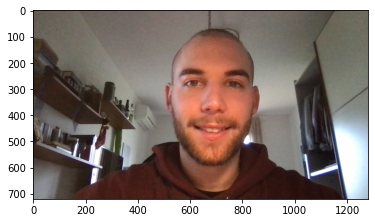

In [11]:
# Controllo immagine
plt.imshow(ph[3][:,:,-1::-1])

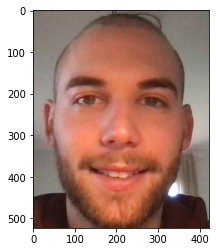

In [12]:
# Controllo crop
plt.imshow(faces[3][:,:,-1::-1])

### Salvataggio immagini

Le immagini vengono salvate su disco in modo iterativo.

In [81]:
#Inserisce registrazioni nella cartella
num = 0
for pic in faces:
    fm = str(num) +'_'+ 'fm' +'_'
    cv.imwrite(f'dsim/fm_pic/{fm}.jpg', pic)
    num = num + 1   

In [52]:
# Per Pulizia Cartella
#dir = r'/Users/francescomartinelli/dsim/fm_pic'
#for f in os.listdir(dir):
#    os.remove(os.path.join(dir, f))